In [260]:
# Packages required (can be installed by pip3 install <package>)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pysal

# London Census data

## Ethnic group (count) in function of frequency sum

Columns names (variables) changed to avoid QGIS truncating to 10 char problem

*Letter "K" removed from original, eg. KS201EW0003 -> S201EW0003*

In [233]:
# Build Census Ethnic dataframe reading csv file
datae = "~/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation" \
        "/KS201ew_2011_oa_Ethnic/KS201EWDATA.csv"
dfce = pd.read_csv(datae)
dfce.head()

,GeoCode,S201EW0001,S201EW0002,S201EW0003,S201EW0004,S201EW0005,S201EW0006,S201EW0007,S201EW0008,S201EW0009,...,S201EW0028,S201EW0029,S201EW0030,S201EW0031,S201EW0032,S201EW0033,S201EW0034,S201EW0035,S201EW0036,S201EW0037
0,K04000001,56075912,45134686,531087,57680,2485942,426715,165974,341727,289984,...,2.519724,2.005337,0.797492,0.701087,1.490337,1.764801,1.060750,0.500102,0.411228,0.594009
1,E92000001,53012456,42279236,517001,54895,2430010,415616,161550,332708,283005,...,2.632781,2.098152,0.823418,0.715875,1.545678,1.844361,1.114863,0.524135,0.416855,0.617653
2,W92000004,3063456,2855450,14086,2785,55932,11099,4424,9019,6979,...,0.563285,0.399190,0.348854,0.445183,0.532666,0.388026,0.124337,0.084219,0.313861,0.184857
3,E12000001,2596886,2431423,8035,1684,34425,5938,3549,8022,4940,...,0.609076,0.763645,0.422506,0.550043,0.527362,0.422891,0.045940,0.040241,0.225270,0.200278
4,E12000002,7052177,6141069,64930,4147,151570,39204,18392,30529,22766,...,1.522268,2.686206,0.650820,0.681336,0.662916,0.840563,0.327998,0.219223,0.347807,0.279176


In [115]:
# slice ethnic columns and sum each column
ethnic = dfce.loc[:,'S201EW0003':'S201EW0019']
ethnic.sum()

S201EW0003     3703523
S201EW0004      400975
S201EW0005    17345662
S201EW0006     2975906
S201EW0007     1157394
S201EW0008     2383070
S201EW0009     2022909
S201EW0010     9873450
S201EW0011     7859348
S201EW0012     3119720
S201EW0013     2738349
S201EW0014     5833722
S201EW0015     6915509
S201EW0016     4159966
S201EW0017     1960479
S201EW0018     1604585
S201EW0019     2326009
dtype: int64

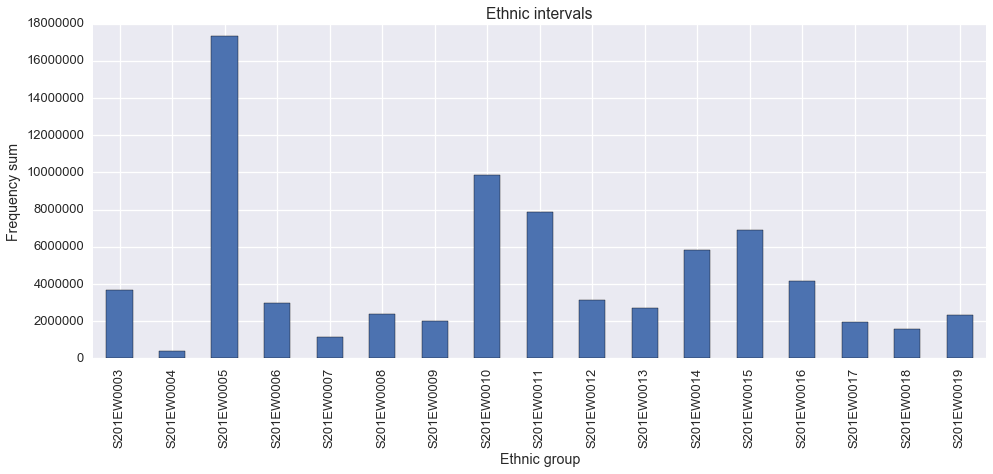

In [117]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(16, 6), dpi=300)
plt.xlabel('Ethnic group')
plt.ylabel('Frequency sum')
plt.title('Ethnic intervals')
plt.ticklabel_format(style='plain', axis='y')

ethnic.sum().plot(kind='bar')

**Ethnic groups code descriptions**

<prep>
```
S201EW0001	All categories: Ethnic group
S201EW0002	White: English/Welsh/Scottish/Northern Irish/British
S201EW0003	White: Irish
S201EW0004	White: Gypsy or Irish Traveller
S201EW0005	White: Other White
S201EW0006	Mixed/multiple ethnic group: White and Black Caribbean
S201EW0007	Mixed/multiple ethnic group: White and Black African
S201EW0008	Mixed/multiple ethnic group: White and Asian
S201EW0009	Mixed/multiple ethnic group: Other Mixed
S201EW0010	Asian/Asian British: Indian
S201EW0011	Asian/Asian British: Pakistani
S201EW0012	Asian/Asian British: Bangladeshi
S201EW0013	Asian/Asian British: Chinese
S201EW0014	Asian/Asian British: Other Asian
S201EW0015	Black/African/Caribbean/Black British: African
S201EW0016	Black/African/Caribbean/Black British: Caribbean
S201EW0017	Black/African/Caribbean/Black British: Other Black
S201EW0018	Other ethnic group: Arab
S201EW0019	Other ethnic group: Any other ethnic group
```
<prep>
* Column S201EW0001 removed from plot, total

**Ethnic groups (count) in function of frequency sum with white (KS201EW0002)**

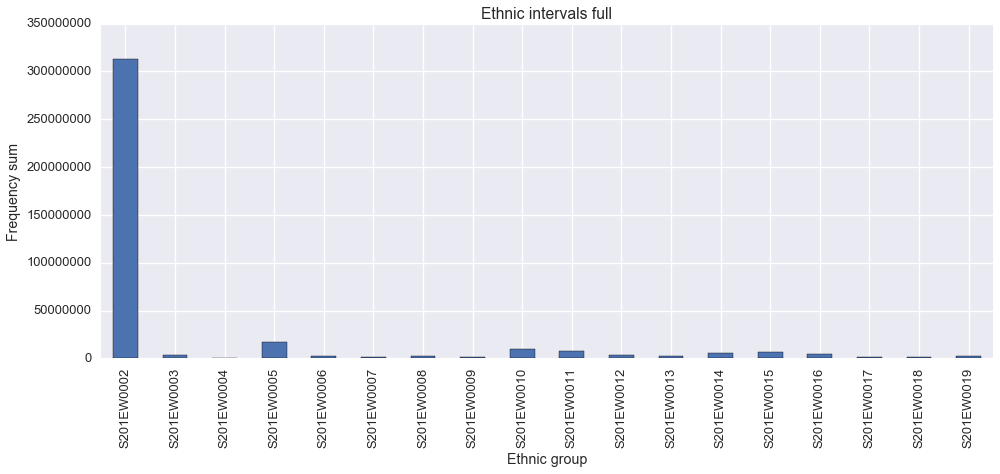

In [119]:
% matplotlib inline

# slice ethnic columns and sum each column
ethnic_full = dfce.loc[:,'S201EW0002':'S201EW0019']

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(16, 6), dpi=300)
plt.xlabel('Ethnic group')
plt.ylabel('Frequency sum')
plt.title('Ethnic intervals full')
plt.ticklabel_format(style='plain', axis='y')

ethnic_full.sum().plot(kind='bar')

### Ethnic groups Correlations

#### Pearson correlation matrix

This data frame selects data from brute groups counts as a text for comparision with proportion data

In [234]:
# Slice dataframe to get counts columns
cor_mat_count = ethnic_full.corr()
cor_mat_count

,S201EW0002,S201EW0003,S201EW0004,S201EW0005,S201EW0006,S201EW0007,S201EW0008,S201EW0009,S201EW0010,S201EW0011,S201EW0012,S201EW0013,S201EW0014,S201EW0015,S201EW0016,S201EW0017,S201EW0018,S201EW0019
S201EW0002,1.000000,0.981370,0.994558,0.968566,0.985074,0.972519,0.986009,0.970035,0.967968,0.978345,0.942529,0.983513,0.956704,0.934869,0.931051,0.926533,0.957109,0.946632
S201EW0003,0.981370,1.000000,0.984941,0.996320,0.996764,0.997882,0.998663,0.997590,0.993769,0.980381,0.981804,0.998788,0.993147,0.983317,0.981024,0.979122,0.991569,0.988904
S201EW0004,0.994558,0.984941,1.000000,0.977614,0.985176,0.978485,0.990394,0.977392,0.971880,0.971509,0.948163,0.985685,0.966715,0.945825,0.940454,0.936206,0.961514,0.955572
S201EW0005,0.968566,0.996320,0.977614,1.000000,0.990573,0.998671,0.995530,0.999473,0.992051,0.966724,0.984416,0.995480,0.997386,0.991545,0.987181,0.986655,0.993724,0.994947
S201EW0006,0.985074,0.996764,0.985176,0.990573,1.000000,0.992662,0.997050,0.992899,0.993807,0.986913,0.977201,0.996280,0.987247,0.975855,0.977326,0.973349,0.986249,0.983216
S201EW0007,0.972519,0.997882,0.978485,0.998671,0.992662,1.000000,0.996420,0.999438,0.992489,0.972286,0.985078,0.997727,0.996285,0.990895,0.986225,0.985995,0.994619,0.993776
S201EW0008,0.986009,0.998663,0.990394,0.995530,0.997050,0.996420,1.000000,0.996314,0.992489,0.981797,0.977693,0.998613,0.991095,0.978797,0.975852,0.973340,0.988480,0.985558
S201EW0009,0.970035,0.997590,0.977392,0.999473,0.992899,0.999438,0.996314,1.000000,0.993692,0.971301,0.986139,0.996801,0.997791,0.992260,0.989088,0.988341,0.995014,0.995561
S201EW0010,0.967968,0.993769,0.971880,0.992051,0.993807,0.992489,0.992489,0.993692,1.000000,0.976445,0.982782,0.992092,0.994082,0.985084,0.986104,0.983275,0.990792,0.990950
S201EW0011,0.978345,0.980381,0.971509,0.966724,0.986913,0.972286,0.981797,0.971301,0.976445,1.000000,0.960356,0.980849,0.964801,0.949064,0.952545,0.947061,0.969947,0.959844


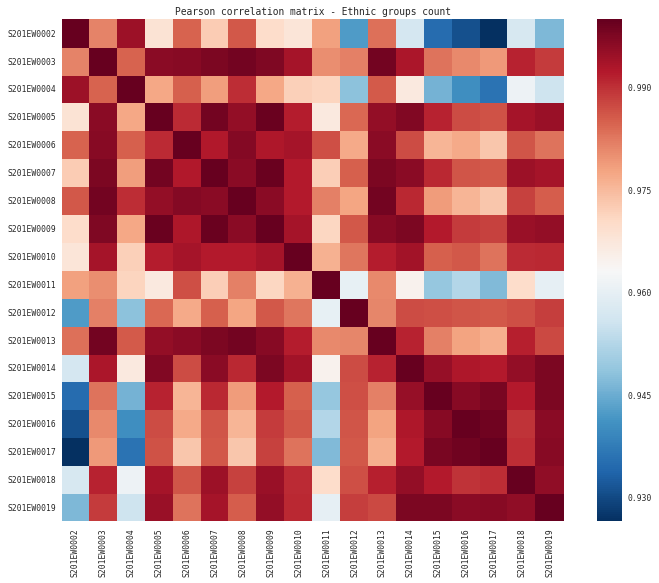

In [247]:
# Plot Heatmap based on cor_mat_count data frame - Counts
% matplotlib inline
sns.set(context="paper", font="monospace")
f1, ax1 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Ethnic groups count')
sns.heatmap(cor_mat_count, cmap='RdBu_r', square=True)

Select columns data with percentage for ethnic groups

In [240]:
# Slice data frame to get proportion data columns

labels_ethnic = ['W British', 'W Irish', 'W Gypsy', 'W Other', 'MX Wbc', 'MX Wba', 'MX Was',
         'MX other', 'As Indian', 'As Pakist', 'As Bangl', 'As Chin', 'As other',
         'B African', 'B Carib', 'B other', 'Oth Arab', 'Other']

ethnic_prop = dfce.loc[:,'S201EW0020':'S201EW0037']
cor_mat_prop = ethnic_prop.corr()
cor_mat_prop

,S201EW0020,S201EW0021,S201EW0022,S201EW0023,S201EW0024,S201EW0025,S201EW0026,S201EW0027,S201EW0028,S201EW0029,S201EW0030,S201EW0031,S201EW0032,S201EW0033,S201EW0034,S201EW0035,S201EW0036,S201EW0037
S201EW0020,1.000000,-0.416598,-0.039401,-0.654911,-0.432184,-0.447249,-0.454670,-0.560538,-0.573284,-0.513658,-0.394510,-0.371156,-0.692544,-0.648329,-0.639843,-0.621067,-0.446394,-0.648194
S201EW0021,-0.416598,1.000000,-0.007213,0.407910,0.229113,0.227808,0.296334,0.354184,0.143131,0.048338,0.055648,0.183249,0.271375,0.228441,0.301191,0.265037,0.216087,0.288921
S201EW0022,-0.039401,-0.007213,1.000000,0.023304,0.013301,0.022695,0.003040,0.015881,-0.005595,0.012242,0.003328,-0.002201,0.015648,0.031801,0.011713,0.015230,-0.001206,0.011880
S201EW0023,-0.654911,0.407910,0.023304,1.000000,0.213992,0.341159,0.394989,0.512735,0.173710,0.071368,0.121256,0.349895,0.407425,0.371111,0.344118,0.337632,0.341997,0.504663
S201EW0024,-0.432184,0.229113,0.013301,0.213992,1.000000,0.312991,0.219420,0.344801,0.106222,0.110378,0.094537,0.115009,0.208018,0.405045,0.550241,0.465137,0.139706,0.267375
S201EW0025,-0.447249,0.227808,0.022695,0.341159,0.312991,1.000000,0.209109,0.368770,0.087651,0.061079,0.116060,0.183422,0.252723,0.503350,0.391763,0.421796,0.222728,0.319325
S201EW0026,-0.454670,0.296334,0.003040,0.394989,0.219420,0.209109,1.000000,0.328862,0.214250,0.168754,0.102157,0.232837,0.325203,0.205777,0.231851,0.215005,0.223392,0.303715
S201EW0027,-0.560538,0.354184,0.015881,0.512735,0.344801,0.368770,0.328862,1.000000,0.157458,0.087459,0.131260,0.251019,0.352102,0.437917,0.457592,0.450361,0.283693,0.437492
S201EW0028,-0.573284,0.143131,-0.005595,0.173710,0.106222,0.087651,0.214250,0.157458,1.000000,0.250961,0.115287,0.124572,0.491429,0.150148,0.203138,0.167802,0.162126,0.320338
S201EW0029,-0.513658,0.048338,0.012242,0.071368,0.110378,0.061079,0.168754,0.087459,0.250961,1.000000,0.226540,0.037923,0.277994,0.114187,0.161775,0.136158,0.156369,0.165773


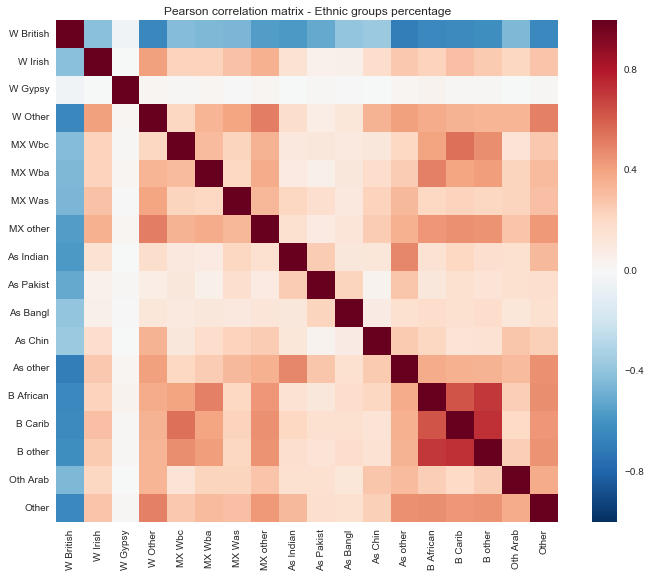

In [257]:
# Plot Heatmap based on cor_mat_prop data frame - Proportions
% matplotlib inline
sns.set(context="notebook")
f2, ax2 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Ethnic groups percentage')
sns.heatmap(cor_mat_prop, square=True, xticklabels=labels_ethnic, yticklabels=labels_ethnic)

Heatmap showing a positive correlation for black groups
<prep>
```
Black/African/Caribbean/Black British: African
Black/African/Caribbean/Black British: Caribbean
Black/African/Caribbean/Black British: Other Black
```
<prep>

#### Moran I correlation matrix 

Based on percentage of groups

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [175]:
shp_path = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "London/OA Boundary/resolution_oa_2011_ks201-501ew.shp"
shp = pysal.open(shp_path)
weight = pysal.queen_from_shapefile(shp_path)
# weight_full = weight.full()

# For distance based weights
# pysal.weights.user.kernelW_from_shapefile

Island id:  [34622]


Contiguity Based Weights using Queen method

Histogram showing the distribuition of neighbors

<Container object of 29 artists>

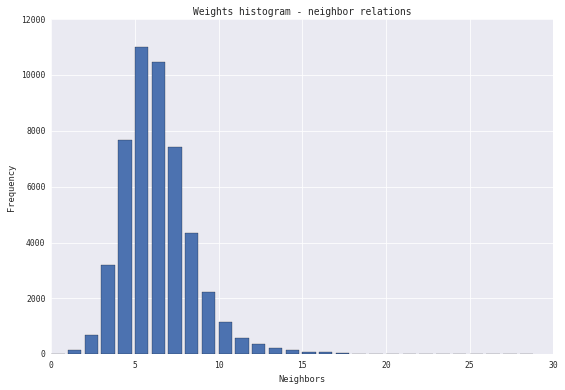

In [227]:
% matplotlib inline
sns.set(context="paper", font="monospace")
plt.figure(facecolor="white", figsize=(9, 6), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Weights histogram - neighbors relations')
plt.bar(*zip(*weight.histogram))

Compute Bivariate Moran for all elements of ethnic groups

Variables are compared pairwised resulting on a matrix

999 random permutations are used for calculation of pseudo p_values

In [205]:
# Read dbf associated with the same shape file
# Obs: QGIS field lenght limit(10) changed column names during join

dbf_path = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "London/OA Boundary/resolution_oa_2011_ks201-501ew.dbf"
f = pysal.open(dbf_path)

def calc_moran(arrayi, arrayj, weight):
    moran = pysal.Moran_BV(arrayi, arrayj, weight, permutations=999)
    result = moran.I
    pvalue = moran.p_z_sim
    return result, pvalue


def block_processing(i, weight, varnames):
    morans = []
    pvalues = []
    
    for item in varnames:
        j = np.array(f.by_col[item])
        serie = calc_moran(i,j,weight)
        moran = serie[0]
        pvalue = serie[1]
        morans.append(moran)
        pvalues.append(pvalue)
    return morans, pvalues


def calc_moran_matrix(varnames):
    moran_matrix = []
    pvalue_matrix = []
    
    for item in varnames:
        i = np.array(f.by_col[item])
        result = block_processing(i,weight, varnames)
        res_moran = result[0]
        res_pvalue = result[1]
        moran_matrix.append(res_moran)
        pvalue_matrix.append(res_pvalue)
    return moran_matrix, pvalue_matrix

In [208]:
# Call main function to compute Moran and P-values ethnic groups
var_ethnics = list(cor_mat_prop)
matrices_ethnic = calc_moran_matrix(var_ethnics)

DataFrame with pairwise results

In [209]:
dfmoran_ethnic = pd.DataFrame(matrices_ethnic[0], columns=var_ethnics, index=var_ethnics)
dfmoran_ethnic

,S201EW0020,S201EW0021,S201EW0022,S201EW0023,S201EW0024,S201EW0025,S201EW0026,S201EW0027,S201EW0028,S201EW0029,S201EW0030,S201EW0031,S201EW0032,S201EW0033,S201EW0034,S201EW0035,S201EW0036,S201EW0037
S201EW0020,0.924502,-0.309150,0.053195,-0.586337,-0.361912,-0.377482,-0.269071,-0.461911,-0.478251,-0.415297,-0.308498,-0.299085,-0.561773,-0.546461,-0.571351,-0.556813,-0.379480,-0.553760
S201EW0021,-0.309540,0.477715,-0.051805,0.364014,0.163274,0.136601,0.221417,0.262937,0.083970,-0.000555,0.001589,0.138881,0.160379,0.092000,0.186593,0.178738,0.208611,0.209993
S201EW0022,0.049015,-0.049809,0.083740,-0.054131,-0.021128,-0.014602,-0.043747,-0.038176,-0.028950,-0.017349,-0.016996,-0.035035,-0.030341,0.004038,-0.017588,-0.015177,-0.027478,-0.029895
S201EW0023,-0.583260,0.359146,-0.058209,0.800560,0.187701,0.248481,0.322026,0.419279,0.079370,0.062465,0.087596,0.341888,0.254006,0.242187,0.274824,0.276247,0.371882,0.462842
S201EW0024,-0.361900,0.166555,-0.023510,0.189780,0.416703,0.270461,0.099473,0.285029,-0.000842,0.070437,0.057097,0.086795,0.120379,0.374241,0.483888,0.418883,0.069748,0.210139
S201EW0025,-0.376093,0.137310,-0.016796,0.248314,0.271030,0.292393,0.100656,0.270845,0.029458,0.053985,0.082120,0.136880,0.139657,0.394327,0.354135,0.355874,0.144838,0.246030
S201EW0026,-0.266011,0.219109,-0.047260,0.320929,0.097067,0.098919,0.233785,0.205264,0.107276,0.044242,0.029212,0.159833,0.170483,0.048482,0.103211,0.098345,0.163100,0.194170
S201EW0027,-0.460588,0.263488,-0.041411,0.421104,0.283006,0.268506,0.207810,0.366677,0.068155,0.050717,0.084839,0.200462,0.198296,0.316584,0.375113,0.363332,0.212747,0.336844
S201EW0028,-0.478120,0.083163,-0.030744,0.078661,-0.000713,0.029644,0.107388,0.067406,0.831850,0.386070,0.075672,0.048817,0.508425,0.067738,0.097604,0.099871,0.138056,0.203937
S201EW0029,-0.412723,-0.001859,-0.019312,0.061611,0.069526,0.053146,0.042434,0.049934,0.383798,0.793697,0.163572,-0.013589,0.313776,0.103334,0.149272,0.107579,0.074797,0.123652


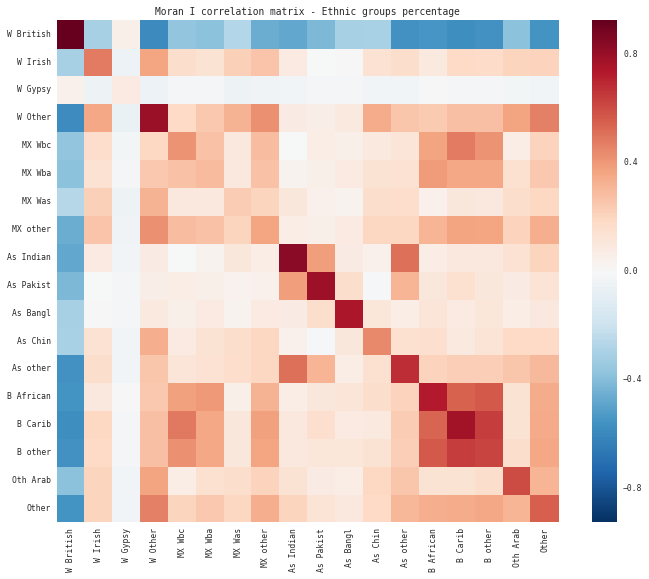

In [258]:
# Plot Heatmap based on dfmoran data frame - Proportions
% matplotlib inline
sns.set(context="paper", font="monospace")
f3, ax3 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Ethnic groups percentage')
sns.heatmap(dfmoran_ethnic, square=True, xticklabels=labels_ethnic, yticklabels=labels_ethnic)

Heatmap showing a positive correlation for black groups
as could be seen in the Pearson correlation


P-values obtained from previous map 

In [211]:
dfpvalue_ethnic = pd.DataFrame(matrices[1], columns=var_ethnics, index=var_ethnics)
dfpvalue_ethnic

,S201EW0020,S201EW0021,S201EW0022,S201EW0023,S201EW0024,S201EW0025,S201EW0026,S201EW0027,S201EW0028,S201EW0029,S201EW0030,S201EW0031,S201EW0032,S201EW0033,S201EW0034,S201EW0035,S201EW0036,S201EW0037
S201EW0020,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0021,0.0,0.000000e+00,9.504011e-52,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.262793e-01,3.276219e-01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0022,0.0,1.805192e-116,0.000000e+00,4.998939e-138,1.142858e-23,2.083825e-11,6.508650e-86,9.942127e-75,1.920251e-41,1.315762e-15,1.850783e-15,1.743501e-61,1.190702e-45,0.024356,4.077191e-16,7.332870e-13,8.763508e-41,1.875246e-46
S201EW0023,0.0,0.000000e+00,1.757747e-39,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0024,0.0,0.000000e+00,8.116487e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.148364e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0025,0.0,0.000000e+00,6.794819e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0026,0.0,0.000000e+00,1.581783e-60,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0027,0.0,0.000000e+00,4.158146e-34,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0028,0.0,0.000000e+00,5.690835e-13,0.000000e+00,4.456126e-01,1.292733e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0029,0.0,3.462455e-01,5.616035e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.494834e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Qualification groups in function of frequency sum

In [212]:
# Build Census Qualification dataframe reading csv file
dataq = "~/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation/"\
        "ks501ew_2011_oa_Qualifications/KS501EWDATA.csv"
dfcq = pd.read_csv(dataq)
dfcq.head()

,GeoCode,S501EW0001,S501EW0002,S501EW0003,S501EW0004,S501EW0005,S501EW0006,S501EW0007,S501EW0008,S501EW0009,...,S501EW0016,S501EW0017,S501EW0018,S501EW0019,S501EW0020,S501EW0021,S501EW0022,S501EW0023,S501EW0024,S501EW0025
0,K04000001,45496780,10307327,6047384,6938433,1631777,5617802,12383477,2570580,1230368,...,15.250383,3.586577,12.347691,27.218359,5.650026,2.704297,5.461927,1.839225,0.483014,3.123190
1,E92000001,42989620,9656810,5714441,6544614,1532934,5309631,11769361,2461829,1163148,...,15.223707,3.565824,12.350961,27.377216,5.726566,2.705648,5.462242,1.842077,0.485043,3.118732
2,W92000004,2507160,650517,332943,393819,98843,308171,614116,108751,67220,...,15.707773,3.942429,12.291637,24.494488,4.337617,2.681121,5.456532,1.790313,0.448236,3.199636
3,E12000001,2134449,565208,291852,335926,101328,279693,473382,87060,54991,...,15.738301,4.747267,13.103757,22.178183,4.078804,2.576356,5.530936,1.765093,0.479890,3.268525
4,E12000002,5727629,1419620,777561,905338,225633,740829,1399038,259610,155844,...,15.806506,3.939379,12.934305,24.426128,4.532591,2.720916,5.430275,1.909551,0.511765,2.992984


In [200]:
# slice qualifications columns and sum each column
qualif = dfcq.loc[:,'S501EW0002':'S501EW0013']
qualif.sum()

S501EW0002    71500772
S501EW0003    41998745
S501EW0004    48175212
S501EW0005    11323596
S501EW0006    39016443
S501EW0007    86070223
S501EW0008    17885309
S501EW0009     8545356
S501EW0010    17258203
S501EW0011     5812630
S501EW0012     1527054
S501EW0013     9866437
dtype: int64

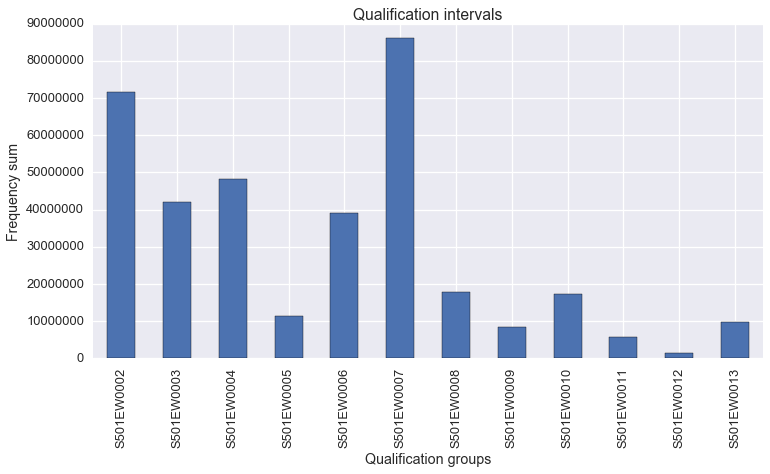

In [201]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 6), dpi=300)
plt.xlabel('Qualification groups')
plt.ylabel('Frequency sum')
plt.title('Qualification intervals')
plt.ticklabel_format(style='plain', axis='y')

qualif.sum().plot(kind='bar')

**Qualification groups code descriptions (counts)**
<prep>
````
S501EW0001	All categories: Highest level of qualification
S501EW0002	No qualifications
S501EW0003	Highest level of qualification: Level 1 qualifications
S501EW0004	Highest level of qualification: Level 2 qualifications
S501EW0005	Highest level of qualification: Apprenticeship
S501EW0006	Highest level of qualification: Level 3 qualifications
S501EW0007	Highest level of qualification: Level 4 qualifications and above
S501EW0008	Highest level of qualification: Other qualifications
S501EW0009	Schoolchildren and full-time students: Age 16 to 17
S501EW0010	Schoolchildren and full-time students: Age 18 and over
S501EW0011	Full-time students: Age 18 to 74: Economically active: In employment
S501EW0012	Full-time students: Age 18 to 74: Economically active: Unemployed
S501EW0013	Full-time students: Age 18 to 74: Economically inactive
````
<prep>
* Column S501EW0001 removed from prot, total

### Qualification groups correlations

#### Pearson correlation matrix

Select columns data with percentage for qualification groups

In [213]:
# Slice data frame to get proportion data columns
quali_prop = dfcq.loc[:,'S501EW0014':'S501EW0025']
cor_quali_prop = quali_prop.corr()
cor_quali_prop

,S501EW0014,S501EW0015,S501EW0016,S501EW0017,S501EW0018,S501EW0019,S501EW0020,S501EW0021,S501EW0022,S501EW0023,S501EW0024,S501EW0025
S501EW0014,1.000000,0.368072,0.013388,0.111881,-0.372750,-0.799109,0.004163,0.023252,-0.216371,-0.232257,-0.076092,-0.209724
S501EW0015,0.368072,1.000000,0.468133,0.220845,-0.142664,-0.687612,-0.114188,0.226889,-0.286014,-0.236166,-0.140278,-0.295760
S501EW0016,0.013388,0.468133,1.000000,0.329572,0.014415,-0.399411,-0.356044,0.312414,-0.323565,-0.255317,-0.215461,-0.329546
S501EW0017,0.111881,0.220845,0.329572,1.000000,-0.020037,-0.292839,-0.380039,-0.026352,-0.331247,-0.280369,-0.277947,-0.321206
S501EW0018,-0.372750,-0.142664,0.014415,-0.020037,1.000000,0.021294,-0.153192,-0.070705,0.693267,0.621128,0.492188,0.674745
S501EW0019,-0.799109,-0.687612,-0.399411,-0.292839,0.021294,1.000000,-0.010232,-0.139873,0.092451,0.091671,-0.037611,0.103979
S501EW0020,0.004163,-0.114188,-0.356044,-0.380039,-0.153192,-0.010232,1.000000,-0.029663,0.237089,0.226080,0.264273,0.209489
S501EW0021,0.023252,0.226889,0.312414,-0.026352,-0.070705,-0.139873,-0.029663,1.000000,-0.078037,-0.076758,-0.035945,-0.076448
S501EW0022,-0.216371,-0.286014,-0.323565,-0.331247,0.693267,0.092451,0.237089,-0.078037,1.000000,0.862780,0.763583,0.976073
S501EW0023,-0.232257,-0.236166,-0.255317,-0.280369,0.621128,0.091671,0.226080,-0.076758,0.862780,1.000000,0.660677,0.746564


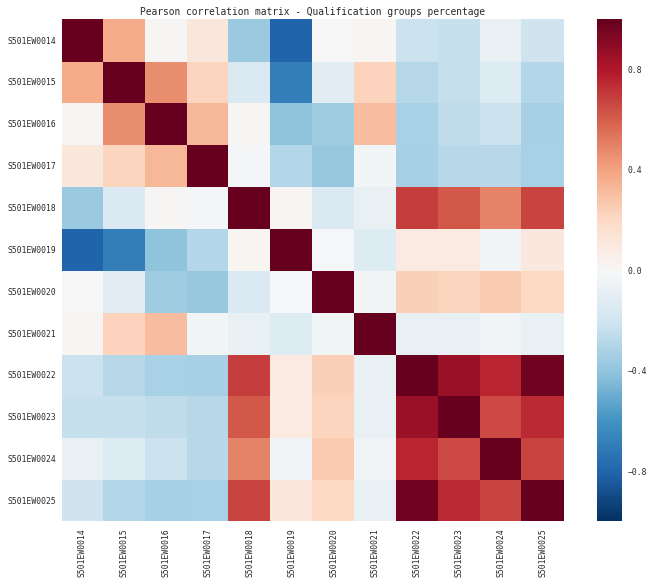

In [214]:
# Plot Heatmap based on cor_mat_prop data frame - Proportions
% matplotlib inline
sns.set(context="paper", font="monospace")
f4, ax4 = plt.subplots(figsize=(12, 9))
plt.title('Pearson correlation matrix - Qualification groups percentage')
sns.heatmap(cor_quali_prop, square=True)

**Qualification groups code descriptions for percentage**

<prep>
```
S501EW0014	No qualifications
S501EW0015	Highest level of qualification: Level 1 qualifications
S501EW0016	Highest level of qualification: Level 2 qualifications
S501EW0017	Highest level of qualification: Apprenticeship
S501EW0018	Highest level of qualification: Level 3 qualifications
S501EW0019	Highest level of qualification: Level 4 qualifications and above
S501EW0020	Highest level of qualification: Other qualifications
S501EW0021	Schoolchildren and full-time students: Age 16 to 17
S501EW0022	Schoolchildren and full-time students: Age 18 and over
S501EW0023	Full-time students: Age 18 to 74: Economically active: In employment
S501EW0024	Full-time students: Age 18 to 74: Economically active: Unemployed
S501EW0025	Full-time students: Age 18 to 74: Economically inactive
```
<prep>

#### Moran I correlation matrix

In [215]:
# Call main function to compute Moran and P-values for qualification groups
var_quali = list(cor_quali_prop)
matrices_quali = calc_moran_matrix(var_quali)

DataFrame with pairwise results

In [216]:
dfmoran_quali = pd.DataFrame(matrices_quali[0], columns=var_quali, index=var_quali)
dfmoran_quali

,S501EW0014,S501EW0015,S501EW0016,S501EW0017,S501EW0018,S501EW0019,S501EW0020,S501EW0021,S501EW0022,S501EW0023,S501EW0024,S501EW0025
S501EW0014,0.514653,0.422906,0.246971,0.216737,-0.050697,-0.541397,0.010470,0.127558,-0.056074,-0.011170,0.043496,-0.086303
S501EW0015,0.424593,0.632709,0.530853,0.434864,0.099063,-0.637002,-0.197261,0.181791,-0.218378,-0.122566,-0.076979,-0.246901
S501EW0016,0.248698,0.529343,0.606736,0.489524,0.171861,-0.487083,-0.380744,0.199125,-0.325321,-0.226296,-0.186094,-0.333124
S501EW0017,0.212840,0.427526,0.486481,0.570648,0.142486,-0.391514,-0.405912,0.109863,-0.327030,-0.249223,-0.230707,-0.316031
S501EW0018,-0.049524,0.102669,0.176453,0.146194,0.342274,-0.103292,-0.172900,0.017601,0.121744,0.114705,0.041915,0.117501
S501EW0019,-0.543991,-0.637926,-0.488058,-0.398669,-0.099983,0.740369,0.046833,-0.199338,0.095705,0.008500,-0.030786,0.142195
S501EW0020,0.016194,-0.189300,-0.378126,-0.403933,-0.171710,0.039451,0.709071,-0.044552,0.379164,0.353269,0.335593,0.323347
S501EW0021,0.132138,0.181924,0.195861,0.106643,0.014764,-0.201305,-0.040761,0.185977,-0.068163,-0.032497,-0.002223,-0.084360
S501EW0022,-0.052984,-0.209290,-0.319037,-0.322016,0.126928,0.088254,0.375556,-0.069297,0.571093,0.483243,0.398190,0.531634
S501EW0023,-0.007730,-0.115534,-0.221574,-0.244386,0.118873,0.002925,0.347313,-0.033952,0.482455,0.489180,0.379479,0.404096


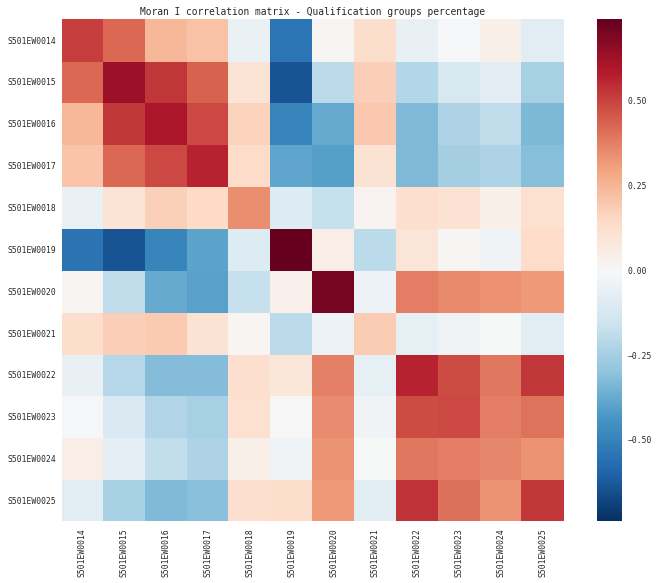

In [217]:
# Plot Heatmap based on dfmoran_quali data frame - Proportions
% matplotlib inline
sns.set(context="paper", font="monospace")
f5, ax5 = plt.subplots(figsize=(12, 9))
plt.title('Moran I correlation matrix - Qualification groups percentage')
sns.heatmap(dfmoran_quali, square=True)

P-values obtained from previous map

In [218]:
dfpvalue_ethnic = pd.DataFrame(matrices[1], columns=var_ethnics, index=var_ethnics)
dfpvalue_ethnic

,S201EW0020,S201EW0021,S201EW0022,S201EW0023,S201EW0024,S201EW0025,S201EW0026,S201EW0027,S201EW0028,S201EW0029,S201EW0030,S201EW0031,S201EW0032,S201EW0033,S201EW0034,S201EW0035,S201EW0036,S201EW0037
S201EW0020,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0021,0.0,0.000000e+00,9.504011e-52,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.262793e-01,3.276219e-01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0022,0.0,1.805192e-116,0.000000e+00,4.998939e-138,1.142858e-23,2.083825e-11,6.508650e-86,9.942127e-75,1.920251e-41,1.315762e-15,1.850783e-15,1.743501e-61,1.190702e-45,0.024356,4.077191e-16,7.332870e-13,8.763508e-41,1.875246e-46
S201EW0023,0.0,0.000000e+00,1.757747e-39,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0024,0.0,0.000000e+00,8.116487e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.148364e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0025,0.0,0.000000e+00,6.794819e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0026,0.0,0.000000e+00,1.581783e-60,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0027,0.0,0.000000e+00,4.158146e-34,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0028,0.0,0.000000e+00,5.690835e-13,0.000000e+00,4.456126e-01,1.292733e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
S201EW0029,0.0,3.462455e-01,5.616035e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.494834e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## Ocupation groups in function of frequency sum

In [230]:
# Build Census Ocupation dataframe reading csv file
datao = "~/Dropbox/Resolution - SP London/Data/Census/London/Census data for Segregation/"\
        "qs607ew_2011_oa/RES Met London data/RES Met London QS607EW_oa_occupation_1.csv"
dfco = pd.read_csv(datao)
dfco.head()

,code,label,name,QS607EW0001,QS607EW0002,QS607EW0003,QS607EW0004,QS607EW0005,QS607EW0006,QS607EW0007,...,QS607EW0046,QS607EW0047,QS607EW0048,QS607EW0049,QS607EW0050,QS607EW0051,QS607EW0052,QS607EW0053,QS607EW0054,QS607EW0055
0,E00000095,E09000002E02000010E01000015E00000095,NaN,330,12,4,0,4,8,7,...,5,16,22,1,24,17,7,29,29,0
1,E00000096,E09000002E02000014E01000013E00000096,NaN,202,10,1,0,1,9,5,...,4,12,11,0,22,18,4,14,14,0
2,E00000097,E09000002E02000014E01000013E00000097,NaN,225,7,0,0,0,7,3,...,2,9,16,0,14,11,3,15,15,0
3,E00000098,E09000002E02000014E01000014E00000098,NaN,207,12,1,0,1,11,7,...,1,11,16,0,21,16,5,11,11,0
4,E00000001,E09000001E02000001E01000001E00000001,NaN,148,65,8,0,8,57,31,...,0,1,1,0,2,1,1,7,7,0


In [231]:
# slice ocupations columns and sum each column
ocupation = dfco.loc[:,'QS607EW0002':'QS607EW0055']
ocupation.sum()

QS607EW0002    1540303
QS607EW0003     324923
QS607EW0004       4106
QS607EW0005     320817
QS607EW0006    1215380
QS607EW0007     597835
QS607EW0008     427500
QS607EW0009     152297
QS607EW0010      37748
QS607EW0011    2764281
QS607EW0012    1789294
QS607EW0013    1277322
QS607EW0014     220604
QS607EW0015     244456
QS607EW0016      46912
QS607EW0017     666079
QS607EW0018     308908
QS607EW0019    1535059
QS607EW0020     975188
QS607EW0021     402166
QS607EW0022     106505
QS607EW0023      51200
QS607EW0024    1170167
QS607EW0025     267515
QS607EW0026     261885
QS607EW0027       5630
QS607EW0028     902652
QS607EW0029     887394
QS607EW0030      15258
QS607EW0031     664214
QS607EW0032     388435
QS607EW0033     275779
QS607EW0034     245578
QS607EW0035      30201
QS607EW0036    1327376
QS607EW0037     441540
QS607EW0038     524387
QS607EW0039      61519
QS607EW0040     103546
QS607EW0041       8521
QS607EW0042     146307
QS607EW0043      41556
QS607EW0044     940769
QS607EW0045

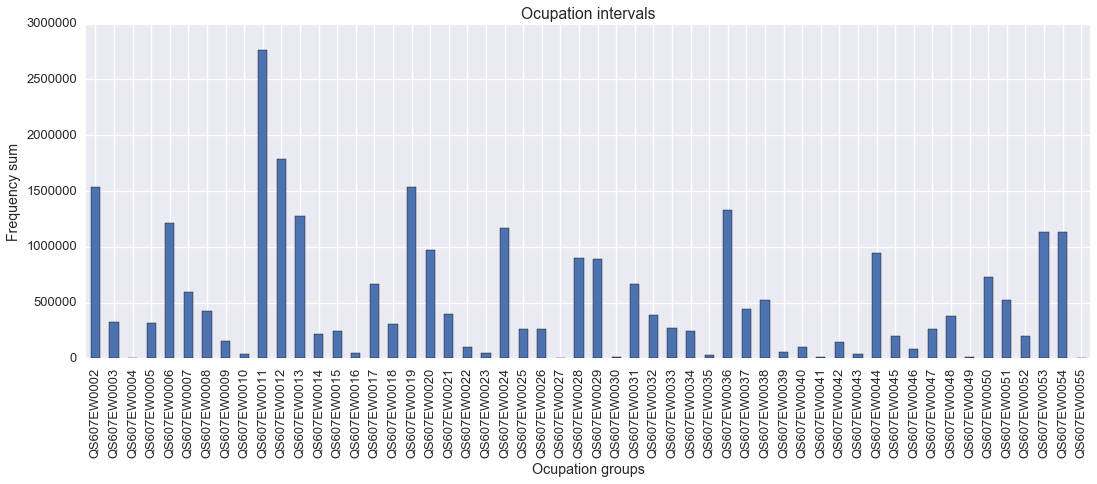

In [19]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(18, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals')
plt.ticklabel_format(style='plain', axis='y')

ocupation.sum().plot(kind='bar')

#### Ocupation groups code descriptions

<prep>
````
QS607EW0001	All categories: NS-SeC
QS607EW0002	1. Higher managerial, administrative and professional occupations
QS607EW0003	1.1 Large employers and higher managerial and administrative occupations
QS607EW0004	L1 Employers in large establishments
QS607EW0005	L2 Higher managerial and administrative occupations
QS607EW0006	1.2 Higher professional occupations
QS607EW0007	L3.1 Traditional employees
QS607EW0008	L3.2 New employees
QS607EW0009	L3.3 Traditional self-employed
QS607EW0010	L3.4 New self-employed
QS607EW0011	2. Lower managerial, administrative and professional occupations
QS607EW0012	L4 Lower professional and higher technical occupations
QS607EW0013	L4.1 Traditional employees
QS607EW0014	L4.2 New employees
QS607EW0015	L4.3 Traditional self-employed
QS607EW0016	L4.4 New self-employed
QS607EW0017	L5 Lower managerial and administrative occupations
QS607EW0018	L6 Higher supervisory occupations
QS607EW0019	3. Intermediate occupations
QS607EW0020	L7.1 Intermediate clerical and administrative occupations
QS607EW0021	L7.2 Intermediate sales and service occupations
QS607EW0022	L7.3 Intermediate technical and auxiliary occupations
QS607EW0023	L7.4 Intermediate engineering occupations
QS607EW0024	4. Small employers and own account workers
QS607EW0025	L8 Employers in small establishments
QS607EW0026	L8.1 Employers in small establishments in industry, commerce, services etc.
QS607EW0027	L8.2 Employers in small establishments in agriculture
QS607EW0028	L9 Own account workers
QS607EW0029	L9.1 Own account workers (non-professional)
QS607EW0030	L9.2 Own account workers (agriculture)
QS607EW0031	5. Lower supervisory and technical occupations
QS607EW0032	L10 Lower supervisory occupations
QS607EW0033	L11 Lower technical occupations
QS607EW0034	L11.1 Lower technical craft occupations
QS607EW0035	L11.2 Lower technical process operative occupations
QS607EW0036	6. Semi-routine occupations
QS607EW0037	L12.1 Semi-routine sales occupations
QS607EW0038	L12.2 Semi-routine service occupations
QS607EW0039	L12.3 Semi-routine technical occupations
QS607EW0040	L12.4 Semi-routine operative occupations
QS607EW0041	L12.5 Semi-routine agricultural occupations
QS607EW0042	L12.6 Semi-routine clerical occupations
QS607EW0043	L12.7 Semi-routine childcare occupations
QS607EW0044	7. Routine occupations
QS607EW0045	L13.1 Routine sales and service occupations
QS607EW0046	L13.2 Routine production occupations
QS607EW0047	L13.3 Routine technical occupations
QS607EW0048	L13.4 Routine operative occupations
QS607EW0049	L13.5 Routine agricultural occupations
QS607EW0050	8. Never worked and long-term unemployed
QS607EW0051	L14.1 Never worked
QS607EW0052	L14.2 Long-term unemployed
QS607EW0053	Not classified
QS607EW0054	L15 Full-time students
QS607EW0055	L17 Not classifiable for other reasons
````
<prep>

* Column removed, totals
* Higher level shows the sum of sub levels? Validating with group 7 the total equals sub levels

### Ocupation groups higher levels in function of frequency sum

In [20]:
# slice ocupations columns and sum each column
higher = dfco[['QS607EW0002',
               'QS607EW0011', 
               'QS607EW0019', 
               'QS607EW0024', 
               'QS607EW0031',
               'QS607EW0036', 
               'QS607EW0044', 
               'QS607EW0050']]
higher.sum()

QS607EW0002    1540303
QS607EW0011    2764281
QS607EW0019    1535059
QS607EW0024    1170167
QS607EW0031     664214
QS607EW0036    1327376
QS607EW0044     940769
QS607EW0050     727015
dtype: int64

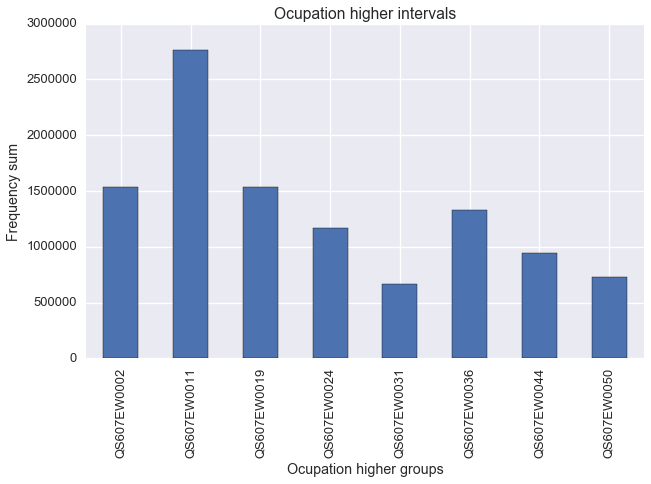

In [21]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Ocupation higher groups')
plt.ylabel('Frequency sum')
plt.title('Ocupation higher intervals')
plt.ticklabel_format(style='plain', axis='y')

higher.sum().plot(kind='bar')